# Project SIM213 - Geo-blocking and e-commerce in the European Union
### Supervisor: Prof. Lukasz Grzybowski
### Team: Maxime Gaby Bustros and Ruila Puskas-Juhasz


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#%pip install pyreadstat

import pandas as pd
database = pd.read_spss('ZA7554_v1-0-0.sav')

In [5]:
database.head()

,tnscntry,serialid,caseid,mode,studyno,doi,version,survey,edition,uniqid,...,w84,w87,w89,w90,w94,w95,w96,w97,w98,wex
0,BELGIQUE,1.0,52779.0,Fixed telephone line,GESIS STUDY ID ZA7554,DOI:10.4232/1.13315,1.00 (2019-08-05),Flash Eurobarometer 477 (February-March 2019),ARCHIVE RELEASE,1052779.0,...,0.0,0.304773,0.245733,0.0,0.0,0.260024,0.0,0.273415,0.0,4504.222656
1,BELGIQUE,2.0,69724.0,Fixed telephone line,GESIS STUDY ID ZA7554,DOI:10.4232/1.13315,1.00 (2019-08-05),Flash Eurobarometer 477 (February-March 2019),ARCHIVE RELEASE,1069724.0,...,0.0,0.391707,0.315825,0.0,0.0,0.334194,0.0,0.351404,0.0,5789.009277
2,BELGIQUE,3.0,44672.0,Fixed telephone line,GESIS STUDY ID ZA7554,DOI:10.4232/1.13315,1.00 (2019-08-05),Flash Eurobarometer 477 (February-March 2019),ARCHIVE RELEASE,1044672.0,...,0.0,0.405290,0.326777,0.0,0.0,0.345783,0.0,0.363590,0.0,5989.756836
3,BELGIQUE,4.0,42908.0,Fixed telephone line,GESIS STUDY ID ZA7554,DOI:10.4232/1.13315,1.00 (2019-08-05),Flash Eurobarometer 477 (February-March 2019),ARCHIVE RELEASE,1042908.0,...,0.0,0.699323,0.563850,0.0,0.0,0.596644,0.0,0.627369,0.0,10335.249023
4,BELGIQUE,5.0,71417.0,Fixed telephone line,GESIS STUDY ID ZA7554,DOI:10.4232/1.13315,1.00 (2019-08-05),Flash Eurobarometer 477 (February-March 2019),ARCHIVE RELEASE,1071417.0,...,0.0,0.299340,0.241352,0.0,0.0,0.255389,0.0,0.268541,0.0,4423.923340


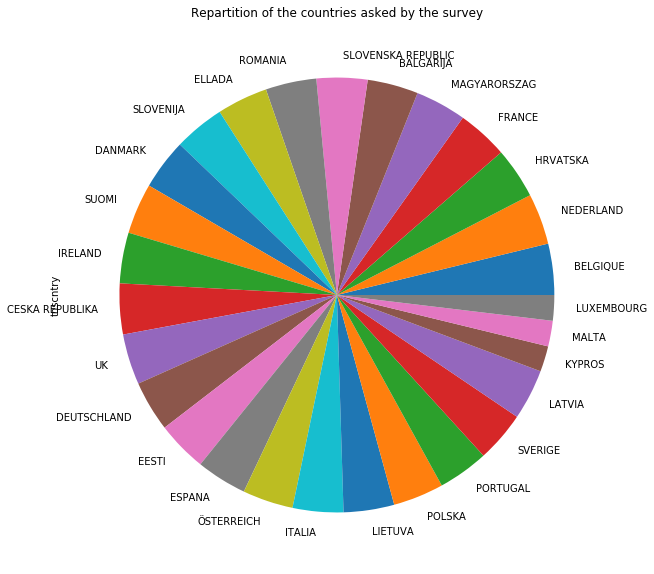

In [18]:
pieRepartition = database['tnscntry'].value_counts()
pieRepartition.plot.pie(title = 'Repartition of the countries asked by the survey', figsize=(10,10))

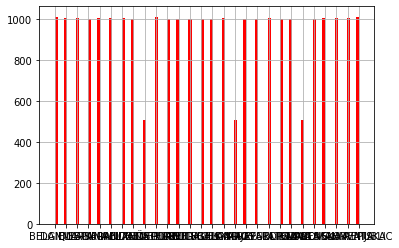

In [27]:
database['tnscntry'].hist(bins = 100, color='red')

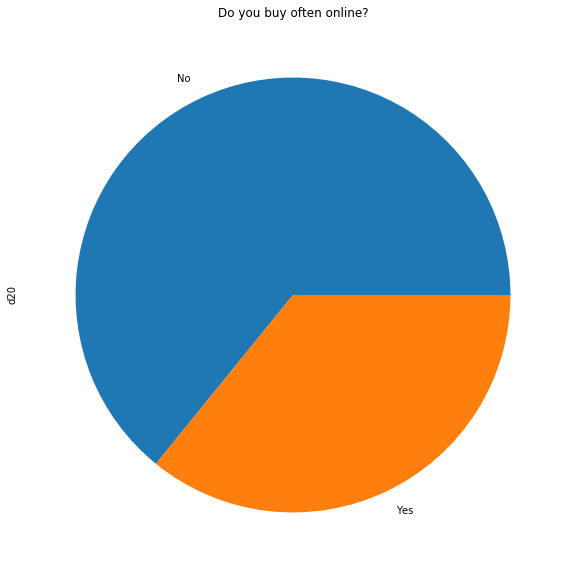

In [31]:
#Use table rather than graph. average age, percentage of females asked. Age differences acrosse countries. 
#bar chart to use
pieFreq = database['d20'].value_counts()
pieFreq.plot.pie(title = 'Do you buy often online?', figsize=(10,10))

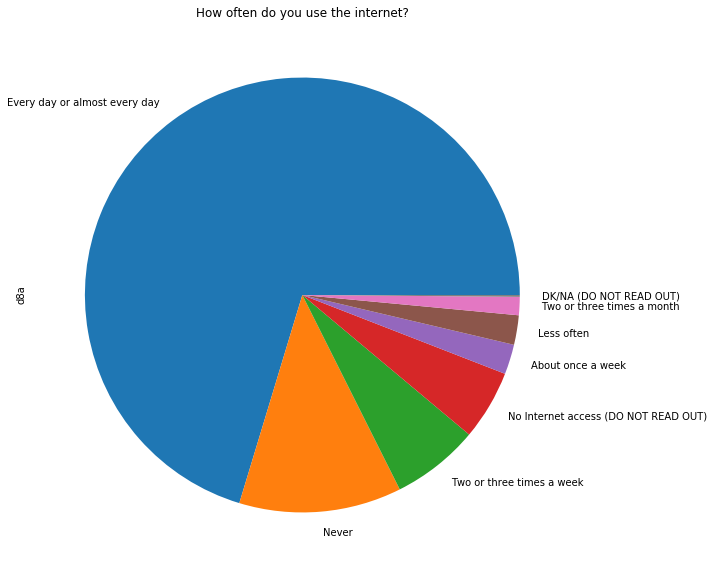

In [32]:
pieFreq = database['d8a'].value_counts()
pieFreq.plot.pie(title = 'How often do you use the internet?', figsize=(10,10))

In [39]:
pieDownload_Stream_music = database['q4.1'].value_counts()
pieDownload_Stream_music.plot.pie(title = 'How often did you use the internet do download or stream Music?', figsize=(10,10))


pieDownload_Stream_sports = database['d8b'].value_counts()
pieDownload_Stream_sports.plot.pie(title = 'How often did you use the internet do download or stream sports?', figsize=(10,10))


pieDownload_Stream_audiovis = database['d8c'].value_counts()
pieDownload_Stream_audiovis.plot.pie(title = 'How often did you use the internet do download or stream audio visual content?', figsize=(10,10))


pieDownload_Stream_ebooks = database['d8d'].value_counts()
pieDownload_Stream_ebooks.plot.pie(title = 'How often did you use the internet do download or stream ebooks?', figsize=(10,10))

pieDownload_Stream_gaming = database['d8e'].value_counts()
pieDownload_Stream_gaming.plot.pie(title = 'How often did you use the internet do download or stream gaming apps?', figsize=(10,10))


KeyError: 'q4.1'